# 1. 가능도 함수 $\mathcal{L}(\theta)=p(x \vert \theta)$
- 모수$\theta$를 확률변수로 상정 $\rightarrow$ 조건부 확률밀도함수

### $$\mathcal{L}(\theta;x) = p(x;\theta)=p(x \vert \theta)$$


- 가능도 함수 $\neq$ 확률밀도함수
$$
\int_{-\infty}^{\infty} p(x; \theta) d\theta \neq 1
$$

- 가능도 함수
    - pdf를 $\theta$의 pdf로 상정
    - 표본 x 발생시, 표본 x를 나오게 하는 $\theta$의 가능성
    - 표본 x 발생시, 표본 x와 변수 $\theta$에서의 확률(밀도함수)
    - **Y는 $\theta$에 대해 어떤 x값이 나올 확률밀도의 값**

|space| pdf|가능도|
|:---:|:---:|:---:|
| $\theta$ | constant | variable |
|x| variable | constant |

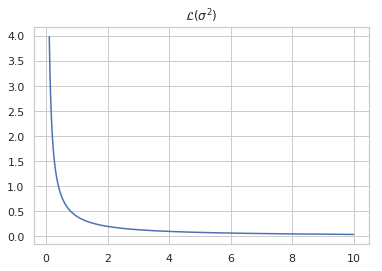

In [36]:
%matplotlib inline
def likelihood_sigma2(theta):
    return sp.stats.norm(scale=theta).pdf(0)

sigma2s = np.linspace(0.1, 10, 1000)
likelihood_sigma2 = [likelihood_sigma2(s) for s in sigma2s]

plt.plot(sigma2s, likelihood_sigma2)
plt.title("$\mathcal{L}(\sigma^2)$")
plt.show()

# 2. 최대 가능도 추정(MLE: Maximum Likelihood Estimation)
- 표본x에 대해 가능도를 가장 크게 하는 모수$\theta$ 찾는 방법


### 표본 하나일 때 예제
- eg. 표본x=1일 때, N(x;$\theta$) 최대 가능도 추정($\hat \mu_{\text{ML}}=1$)

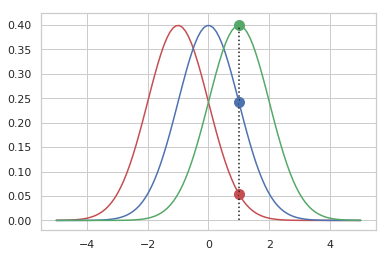

In [46]:
x = np.linspace(-5, 5, 100)
sample_x = 1 
p1 = sp.stats.norm(loc=-1)
p2 = sp.stats.norm(loc=0)
p3 = sp.stats.norm(loc=1)

plt.scatter(sample_x, p1.pdf(sample_x), s=100, c='r')
plt.scatter(sample_x, p2.pdf(sample_x), s=100, c='b')
plt.scatter(sample_x, p3.pdf(sample_x), s=100, c='g')
plt.vlines(sample_x, 0, 0.4, linestyles=":")

plt.plot(x, p1.pdf(x), c='r')
plt.plot(x, p2.pdf(x), c='b')
plt.plot(x, p3.pdf(x), c='g')

plt.show()


### 확률변수의 표본 복수개
- 보통 확률변수의 표본은 복수개 {${x_1,\; \ldots\;, x_N}$}
- 복수 표본에 대한 $\hat \mu_{\text{ML}}$은 아래 식에서 구함
#### $$결합확률 밀도 P_{X_1,\; \ldots \;, X_N}(x_1, \; \ldots \;, x_N;\theta) $$
- 따라서 식은 아래와 같음
### $$
\mathcal{L}(\theta;x_1, \cdots, x_N) = \prod_{i=1}^Np(x_i;\theta)
$$

eg. 실전문제
$$
\mathcal{L}(\theta;x_1, x_2, x_3) = f_{X_1}(x_1)f_{X_2}(x_2)f_{X_2}(x_3)
$$

# 3. 최대 가능도 추정의 구현
- 가능도 최대되는 $\theta\$ 계산 = 수치적 최적화(numerical optimization)
- 보통 로그 변환 가능도 함수 사용(LL = log(L))

### $$
\hat \theta_{ML} = \arg \max_{\theta} L(\theta; \{x_i\}) \rightarrow
\arg \max_{\theta} \log{L}(\theta; \{x_i\})
$$

- 특징
    - 최대값 위치 그대로
    - 곱셈이 덧셈으로 되어 계산 단순


연습문제